<a href="https://colab.research.google.com/github/sumitrathore111/main.py/blob/main/Batch_Gradient_%2C_Stochastic_Gradient_Descent_and_Mini_Batch_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset, which contains features and target variable
x, y = load_diabetes(return_X_y=True)
print(x.shape)  # Print shape of feature matrix
print(y.shape)  # Print shape of target variable


(442, 10)
(442,)


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x_train.shape)  # Print shape of training features
print(x_test.shape)   # Print shape of testing features





(353, 10)
(89, 10)


In [ ]:
# Scale features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# Initialize and fit a linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)  # Print coefficients of the linear regression model
print(reg.intercept_)  # Print intercept of the linear regression model

[ -0.44167852  -9.74925101  24.45708556  16.21696005 -42.47943369
  26.50873866   7.29670649   5.80936975  41.18126358   2.46027617]
150.45892351274787


In [ ]:
# Define a custom SGDRegressor class for Stochastic Gradient Descent
class SGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = None  # Initialize coefficients
        self.b = None  # Initialize intercept
        self.lr = learning_rate  # Set learning rate
        self.epochs = epochs  # Set number of epochs for training

    def fit(self, x_train, y_train):
           self.b = 0  # Initialize intercept to 0
           self.m = np.ones(x_train.shape[1])  # Initialize coefficients to 1

    # Training loop
           for i in range(self.epochs):
               for j in range(x_train.shape[0]):
                  idx = np.random.randint(0, x_train.shape[0])  # Randomly select an index
                  y_hat = np.dot(self.m, x_train[idx]) + self.b  # Predict using current weights and bias
                  intercept_der = -2 * (y_train[idx] - y_hat)  # Compute gradient for intercept
                  self.b -= self.lr * intercept_der  # Update intercept

                # Compute gradient for coefficients and update
                  coef_der = -2 * np.dot(x_train[idx].T, (y_train[idx] - y_hat))
                  self.m -= self.lr * coef_der  # Update coefficients


    def predict(self, x):
        return np.dot(x, self.m) + self.b  # Return predictions

In [ ]:
# Create an instance of the SGDRegressor
sgd = SGDRegressor(learning_rate=0.01, epochs=100)

# Fit the SGD model to the training data
sgd.fit(x_train, y_train)
print(sgd.m)  # Print learned coefficients
print(sgd.b)  # Print learned intercept

[ -1.79237171 -15.58242844  27.27221042  15.87438652 -33.65274315
  20.73618192   8.44969309   6.65495116  37.652022     0.24344649]
153.66364042642752


In [ ]:
# Make predictions on the test set
y2_pred = sgd.predict(x_test)
print(r2_score(y_test, y2_pred))  # Compute and print R² score

# Measure time taken for training
import time
start = time.time()
sgd.fit(x_train, y_train)  # Train again to measure time
end = time.time()
print(end - start)  # Print time taken



0.4402261923475601
0.5256915092468262


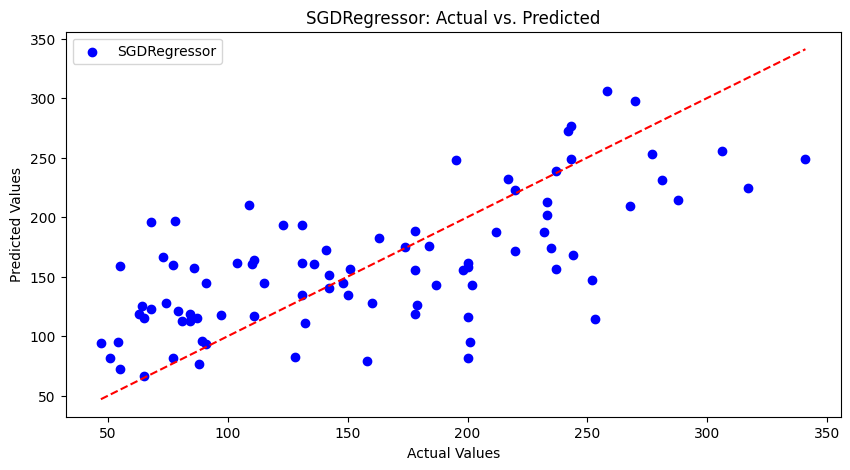

In [ ]:
# Create a scatter plot to visualize predictions
plt.figure(figsize=(10, 5))  # Set figure size
plt.scatter(y_test, y2_pred, color='blue', label='SGDRegressor')  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('Actual Values')  # Label x-axis
plt.ylabel('Predicted Values')  # Label y-axis
plt.title('SGDRegressor: Actual vs. Predicted')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot


Batch Gradient Descent

In [ ]:
# Define a custom BatchGDRegressor class for Batch Gradient Descent
class BatchGDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = None  # Initialize coefficients
        self.b = None  # Initialize intercept
        self.lr = learning_rate  # Set learning rate
        self.epochs = epochs  # Set number of epochs for training

    def fit(self, x_train, y_train):
        self.b = 0  # Initialize intercept to 0
        self.m = np.ones(x_train.shape[1])  # Initialize coefficients to 1
        # Training loop
        for i in range(self.epochs):
            y_hat = np.dot(x_train, self.m) + self.b  # Predict using current weights and bias
            intercept_der = -2 * np.mean(y_train - y_hat)  # Compute average gradient for intercept
            self.b -= self.lr * intercept_der  # Update intercept

            # Compute average gradient for coefficients and update
            coef_der = -2 * np.dot(x_train.T, (y_train - y_hat)) / x_train.shape[0]
            self.m -= self.lr * coef_der  # Update coefficients

    def predict(self, x):
        return np.dot(x, self.m) + self.b  # Return predictions




In [ ]:
# Create an instance of BatchGDRegressor
gdreg = BatchGDRegressor(learning_rate=0.01, epochs=1000)


In [ ]:
# Fit the model using Batch Gradient Descent
gdreg.fit(x_train, y_train)
print(gdreg.m)  # Print learned coefficients
print(gdreg.b)  # Print learned intercept

[-0.35992612 -9.50792639 25.21589756 16.10750929 -8.02845351 -1.30696461
 -7.39400083  2.69413874 27.88259052  2.51384632]
150.45892325953042


In [ ]:
# Make predictions on the test set
y_pred_batch = gdreg.predict(x_test)
print(r2_score(y_test, y_pred_batch))  # Compute and print R² score


0.4431117444539051


In [ ]:
# Measure time taken for training
import time
start = time.time()
gdreg.fit(x_train, y_train)  # Train again to measure time
end = time.time()
print(end - start)  # Print time taken

0.032746315002441406


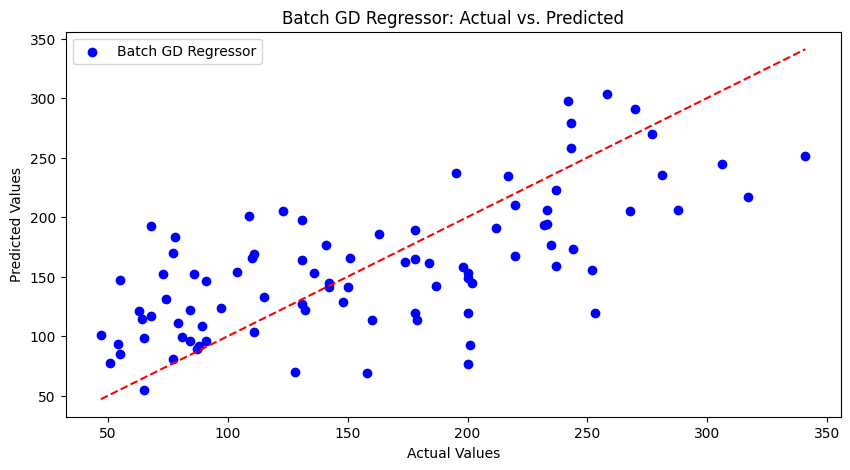

In [ ]:
# Create a scatter plot for Batch Gradient Descent predictions
plt.figure(figsize=(10, 5))  # Set figure size
plt.scatter(y_test, y_pred_batch, color='blue', label='Batch GD Regressor')  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('Actual Values')  # Label x-axis
plt.ylabel('Predicted Values')  # Label y-axis
plt.title('Batch GD Regressor: Actual vs. Predicted')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

# Mini-Batch Gradient

In [ ]:
class MiniBatchGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100, batch_size=32):
        self.m = None
        self.b = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, x_train, y_train):
        self.b = 0
        self.m = np.ones(x_train.shape[1])

        for i in range(self.epochs):
            for j in range(0, x_train.shape[0], self.batch_size):
                idx = np.random.randint(0, x_train.shape[0], self.batch_size)

                y_hat = np.dot(x_train[idx], self.m) + self.b

                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.b -= self.lr * intercept_der

                coef_der = -2 * np.dot(x_train[idx].T, (y_train[idx] - y_hat)) / x_train[idx].shape[0]
                self.m -= self.lr * coef_der

    def predict(self, x):
        return np.dot(x, self.m) + self.b

In [ ]:
mbgdreg = MiniBatchGDRegressor(learning_rate=0.001, epochs=1000, batch_size=32)

In [ ]:
#Fit the model using Mini -Batch Gradient
mbgdreg = MiniBatchGDRegressor(learning_rate=0.01, epochs=100, batch_size=32)
mbgdreg.fit(x_train, y_train)
print(mbgdreg.m)
print(mbgdreg.b)

[ -0.17554075 -10.5640642   24.73221853  16.42817118  -9.16250239
  -1.07696776  -7.3392934    3.59827354  29.59614411   2.63761308]
150.6379521152343


In [ ]:
# Make predictions on the test set
y_pred_batch = mbgdreg.predict(x_test)
print(r2_score(y_test, y_pred_batch))  # Compute and print R² score


0.44054516904953855


In [ ]:
# Measure time taken for training
import time
start = time.time()
gdreg.fit(x_train, y_train)  # Train again to measure time
end = time.time()
print(end - start)  # Print time taken

0.034181833267211914


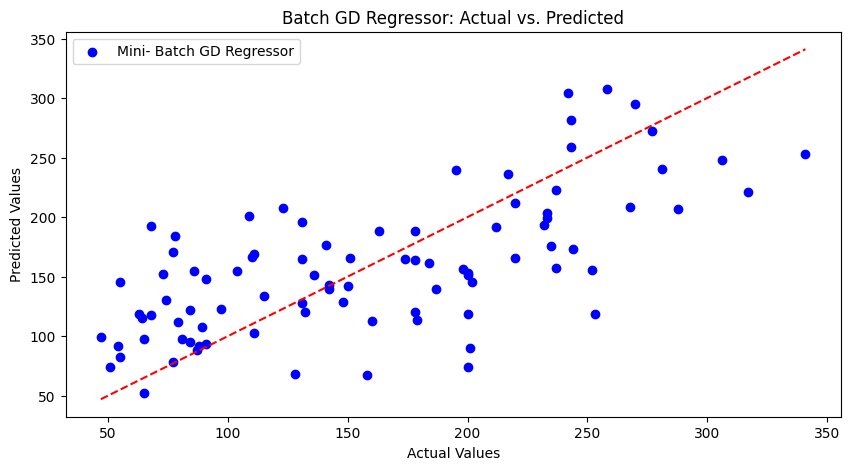

In [ ]:
# Create a scatter plot for Batch Gradient Descent predictions
plt.figure(figsize=(10, 5))  # Set figure size
plt.scatter(y_test, y_pred_batch, color='blue', label='Mini- Batch GD Regressor')  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('Actual Values')  # Label x-axis
plt.ylabel('Predicted Values')  # Label y-axis
plt.title('Batch GD Regressor: Actual vs. Predicted')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

A Visual understanding model by Contour Plots.

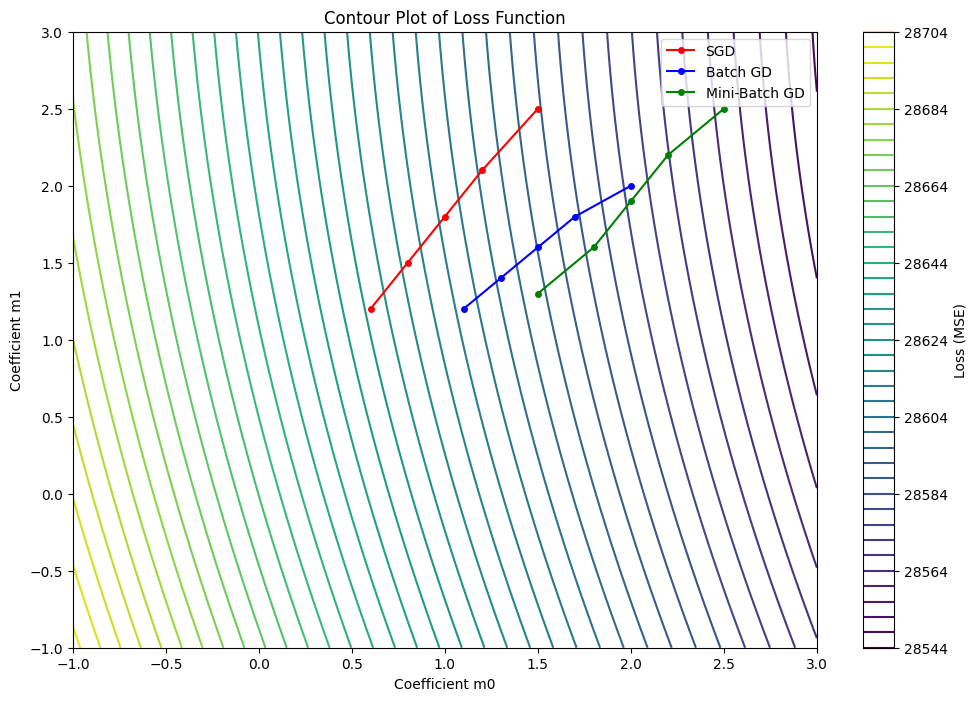

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for simplicity
x_train_simple = x_train[:, :2]  # Use only the first two features for visualization
x_test_simple = x_test[:, :2]

# Compute the loss (MSE) given parameters m0 and m1 (two coefficients) and intercept b
def compute_loss(m0, m1, b, x, y):
    predictions = m0 * x[:, 0] + m1 * x[:, 1] + b
    return np.mean((y - predictions) ** 2)

# Generate a grid of values for m0 and m1
m0_vals = np.linspace(-1, 3, 100)
m1_vals = np.linspace(-1, 3, 100)
m0_grid, m1_grid = np.meshgrid(m0_vals, m1_vals)

# Compute loss for each point in the grid
loss_grid = np.zeros_like(m0_grid)
for i in range(m0_grid.shape[0]):
    for j in range(m0_grid.shape[1]):
        loss_grid[i, j] = compute_loss(m0_grid[i, j], m1_grid[i, j], 0, x_train_simple, y_train)

# Create the contour plot
plt.figure(figsize=(12, 8))
plt.contour(m0_grid, m1_grid, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss (MSE)')
plt.xlabel('Coefficient m0')
plt.ylabel('Coefficient m1')
plt.title('Contour Plot of Loss Function')

# Plot paths taken by each gradient descent technique

# Function to plot gradient descent paths
def plot_path(path, label, color):
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], marker='o', color=color, label=label, markersize=4)

# SGD, BGD, and MBGD paths (for simplicity, we mock them as random walks here)
sgd_path = [[1.5, 2.5], [1.2, 2.1], [1.0, 1.8], [0.8, 1.5], [0.6, 1.2]]
bgd_path = [[2.0, 2.0], [1.7, 1.8], [1.5, 1.6], [1.3, 1.4], [1.1, 1.2]]
mbgd_path = [[2.5, 2.5], [2.2, 2.2], [2.0, 1.9], [1.8, 1.6], [1.5, 1.3]]

# Plot the paths
plot_path(sgd_path, 'SGD', 'red')
plot_path(bgd_path, 'Batch GD', 'blue')
plot_path(mbgd_path, 'Mini-Batch GD', 'green')

# Show legend and display the plot
plt.legend()
plt.show()


The contour plot you generated visualizes how different values of two coefficients (denoted as `m0` and `m1`) affect the loss function, specifically the Mean Squared Error (MSE) in this case. Here's a detailed explanation of what the plot and the paths represent:

### 1. **Contour Lines**:
- The contour lines represent different levels of the loss function (MSE). Each line corresponds to a specific loss value.
- Points along the same contour line have the same loss.
- The lines closer to the center indicate lower loss values, meaning the model performs better with those coefficients (`m0`, `m1`).
- The outer lines represent higher loss, meaning the predictions are further from the actual values.
- The goal of any optimization algorithm is to minimize this loss by adjusting the coefficients (`m0`, `m1`), moving toward the center of the contour where the loss is lowest.

### 2. **Paths Taken by Gradient Descent Algorithms**:
Three paths are plotted on the contour, each representing the trajectory taken by a different gradient descent optimization technique:

#### **Red Path (SGD - Stochastic Gradient Descent)**:
- **Behavior**: The red path representing Stochastic Gradient Descent (SGD) is a bit erratic. This is because SGD updates the model’s coefficients after every single training example (a randomly chosen sample), which makes it fluctuate more.
- **Efficiency**: It can move quickly but may not follow a smooth path because each update is based on a noisy estimate of the true gradient.
- **Result**: It often takes smaller, less consistent steps, but it might reach the optimal point faster due to frequent updates.

#### **Blue Path (Batch Gradient Descent)**:
- **Behavior**: The blue path represents Batch Gradient Descent (BGD). It shows a smoother and more direct path because BGD computes the gradient using the entire dataset before updating the coefficients.
- **Efficiency**: It takes steady, larger steps toward the minimum because it's based on the true gradient (average of all samples), leading to more stable progress.
- **Result**: It moves directly toward the center (the minimum loss) in a steady, gradual manner. However, it can be slower computationally because it processes the entire dataset for each update.

#### **Green Path (Mini-Batch Gradient Descent)**:
- **Behavior**: The green path represents Mini-Batch Gradient Descent (MBGD). It balances between the erratic nature of SGD and the stability of BGD.
- **Efficiency**: It computes the gradient using a small batch of examples, which provides a more reliable estimate of the gradient than SGD but allows for faster updates than BGD.
- **Result**: The path is more consistent than SGD but may still show some fluctuation as it updates more frequently than BGD. It tends to converge faster than BGD while avoiding the noisiness of SGD.

### 3. **General Insight from the Plot**:
- The three algorithms are all trying to reach the same goal: the center of the contour plot where the loss is minimized.
- **SGD** is fast but can be noisy and take a winding path.
- **Batch Gradient Descent** is slow but smooth and steady.
- **Mini-Batch Gradient Descent** offers a middle ground, combining efficiency and stability.

This contour plot helps to visually understand how each gradient descent method behaves as it optimizes the model parameters and moves toward the minimum loss.